In [1]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
data = pd.read_excel("C:/Users/srian/Documents/GitHub/Generative-AI-project/Centrifugal_pumps_measurements.xlsx")

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,Healthy
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,Healthy
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,Healthy
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,Healthy
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,Not Healthy
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,Not Healthy
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,Not Healthy
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,Not Healthy


In [3]:
# Checking for missing values
data.isnull().sum()

Machine_ID     0
value_ISO      0
value_DEMO     0
value_ACC      0
value_P2P      0
valueTEMP      0
minute         0
second         0
year           0
month          0
day            0
hour           0
Pump_Status    0
dtype: int64

In [4]:
# # Combine date and time components to create a single datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])
data.set_index('datetime', inplace=True)

In [5]:
# Drop unnecessary columns
data = data.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis=1)

In [6]:
# Encode the 'Pump_Status' column
data['Pump_Status'] = data['Pump_Status'].apply(lambda x: 1 if x == 'Healthy' else 0)

In [7]:
data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,Pump_Status
datetime,,,,,,,
2022-12-07 12:33:41,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:46,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:51,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:56,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:34:01,1,0.349609,0.000343,0.012512,0.042480,24.25,1
...,...,...,...,...,...,...,...
2022-12-14 15:11:47,2,0.023193,0.000277,0.000637,0.006409,23.00,0
2022-12-14 15:11:52,2,0.023193,0.000277,0.000637,0.006409,23.00,0
2022-12-14 15:11:57,2,0.023193,0.000277,0.000637,0.006409,23.00,0


Exploratory Data Analysis (EDA)

    1. Visualize Feature Trends

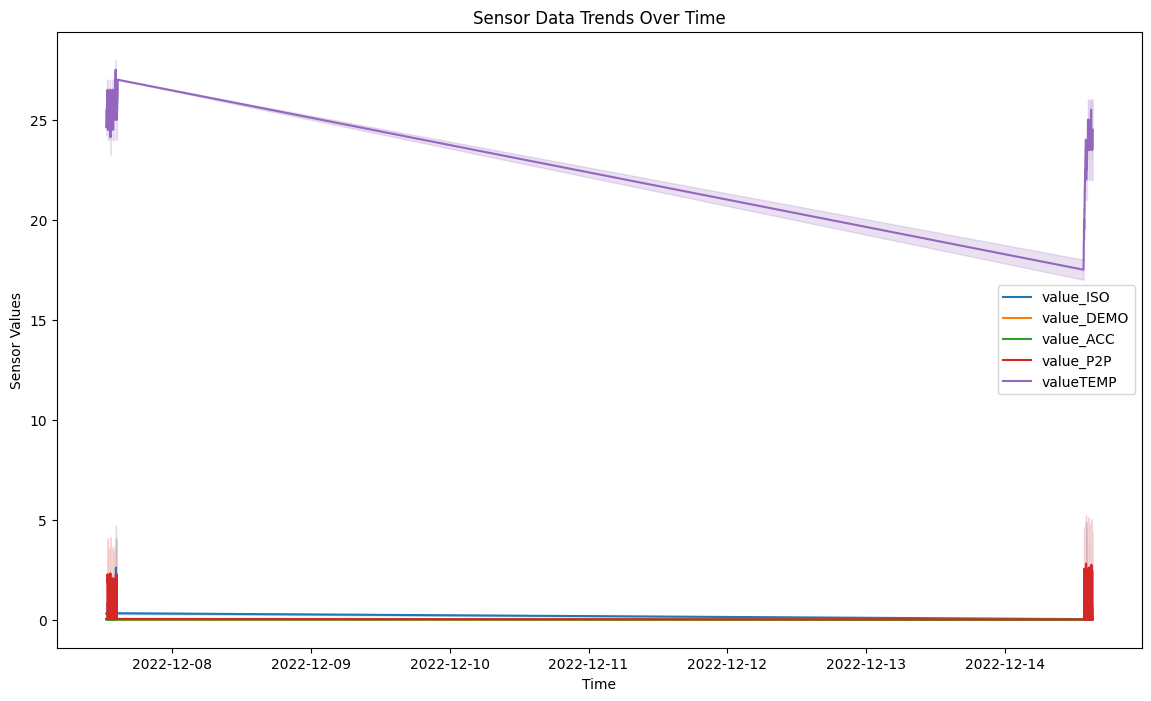

In [8]:
plt.figure(figsize=(14, 8))
for col in ['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']:
    sns.lineplot(data=data, x=data.index, y=col, label=col)
plt.title('Sensor Data Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()

    2. Correlation Heatmap

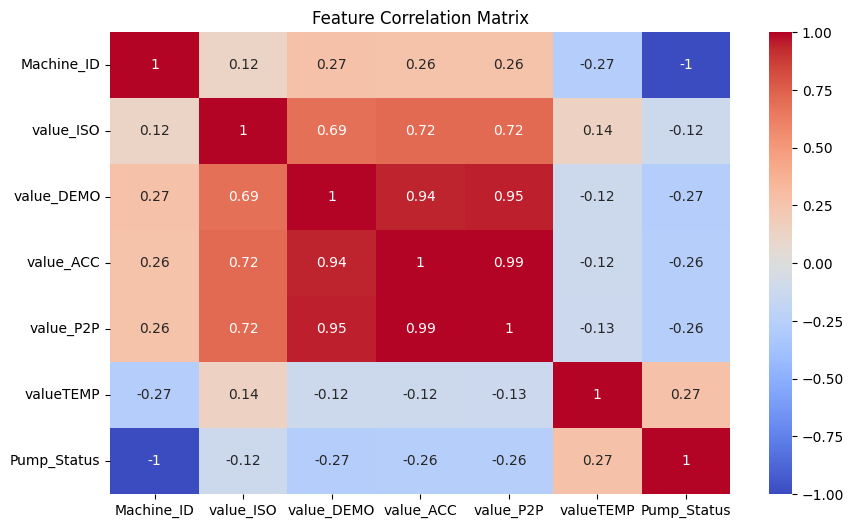

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Step 3: Feature Engineering

    1. Create Lag Features
        - Generate lag features to capture temporal dependencies.

In [10]:
for col in ['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

    2. Drop NaN values created by shifts

In [11]:
data.dropna(inplace=True)

    3. Scale the Features

In [12]:
features = data.drop('Pump_Status', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [13]:
data_scaled

array([[-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       [-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       [-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       ...,
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788],
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788],
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788]])

Step 4: Build an Autoencoder for Anomaly Detection

In [14]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the Autoencoder
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 1.1357
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.7394
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.5835
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.6153
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.6801
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.6177
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.6081
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.5870
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.5898
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.5620
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.6036
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.6211
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.5785
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.5958
Epoch 15/100
16

Step 5: Anomaly Detection

    1. Calculate Reconstruction Error

In [15]:
reconstruction = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.abs(data_scaled - reconstruction), axis=1)
anomaly_threshold = np.percentile(reconstruction_error, 95)
data['Anomaly_Score'] = reconstruction_error
data['Anomaly'] = data['Anomaly_Score'] > anomaly_threshold

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


    2. Visualize Anomalies

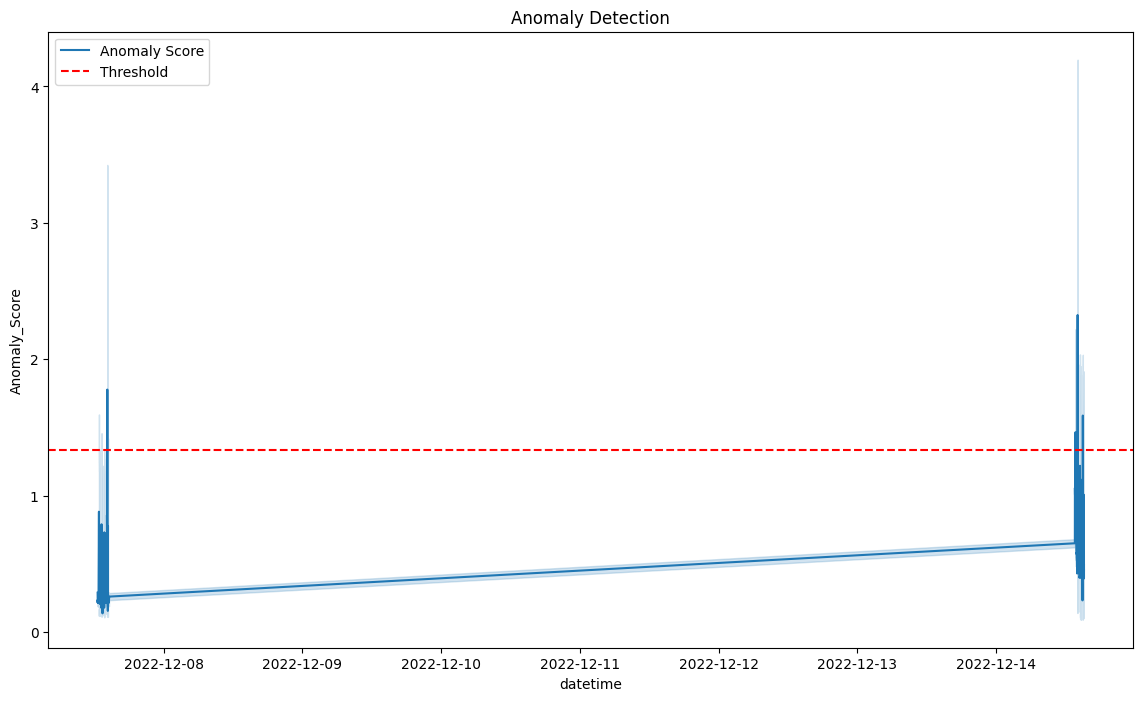

In [16]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x=data.index, y='Anomaly_Score', label='Anomaly Score')
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Anomaly Detection')
plt.show()

Step 6: Predictive Maintenance Model (e.g., XGBoost for RUL Prediction)

    1. Split Data for Training and Testing

In [17]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = data.drop(['Pump_Status', 'Anomaly_Score', 'Anomaly'], axis=1)
y = data['Pump_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)

    2. Evaluate Model Performance

In [18]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       542

    accuracy                           1.00      1023
   macro avg       1.00      1.00      1.00      1023
weighted avg       1.00      1.00      1.00      1023

Accuracy: 1.0
